## Import

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras import layers
import shutil
from PIL import Image

seed = 27912
np.random.seed(seed)

## data 불러오기

In [266]:
pokemon=pd.read_csv("Pokemon.csv")
pokemon_list=pd.read_csv('pokemon_list.csv')
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [267]:
pokemon.shape

(800, 13)

In [268]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [269]:
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [270]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [271]:
#type2 결측치 해결하기 
pokemon['Type 2'].fillna("NO", inplace=True) 
pokemon.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [272]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NO,309,39,52,43,60,50,65,1,False


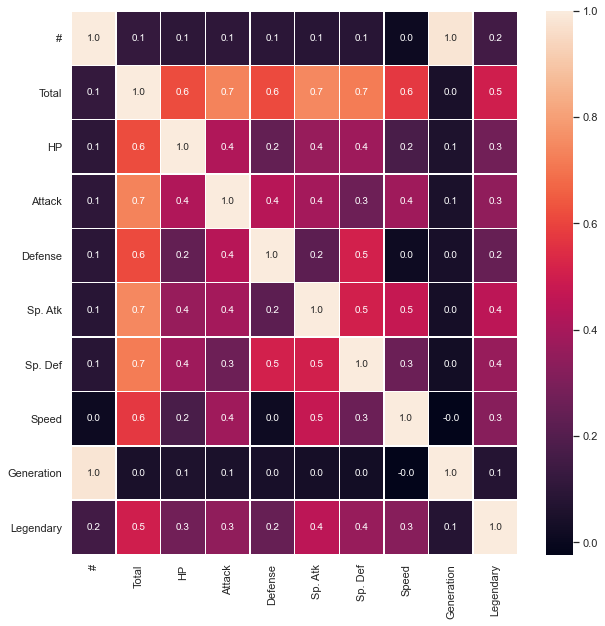

In [273]:
#기능 간 상관관계 
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(pokemon.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

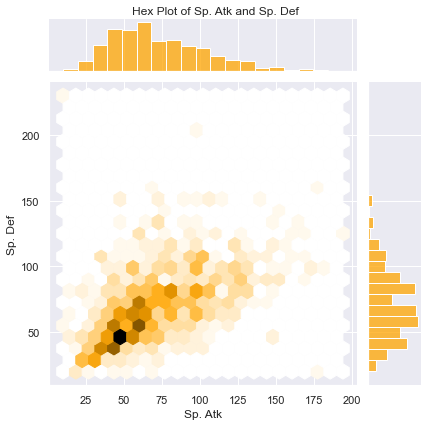

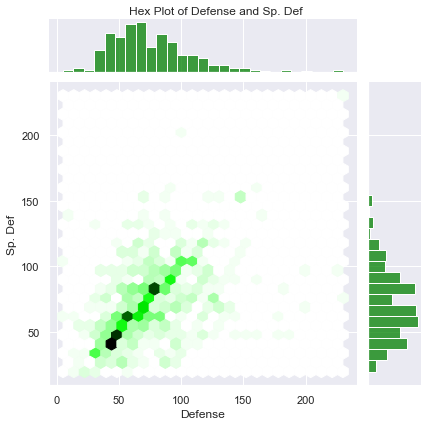

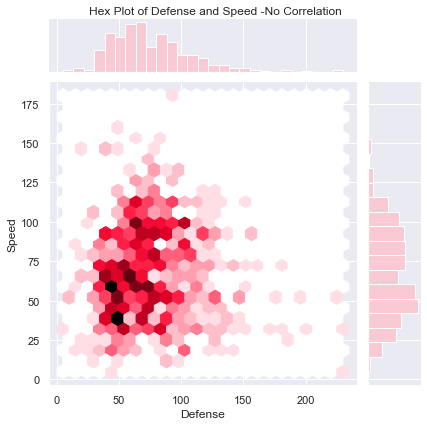

In [276]:
p1 = sns.jointplot(x="Sp. Atk",y="Sp. Def",data=pokemon,kind="hex",color="orange")
p1.fig.suptitle("Hex Plot of Sp. Atk and Sp. Def")
p1.fig.subplots_adjust(top=0.95)

p2 = sns.jointplot(x="Defense",y="Sp. Def",data=pokemon,kind="hex",color="green")
p2.fig.suptitle("Hex Plot of Defense and Sp. Def")
p2.fig.subplots_adjust(top=0.95)

p3 = sns.jointplot(x="Defense",y="Speed",data=pokemon,kind="hex",color="pink")
p3.fig.suptitle("Hex Plot of Defense and Speed -No Correlation")
p3.fig.subplots_adjust(top=0.95)

## 시각화

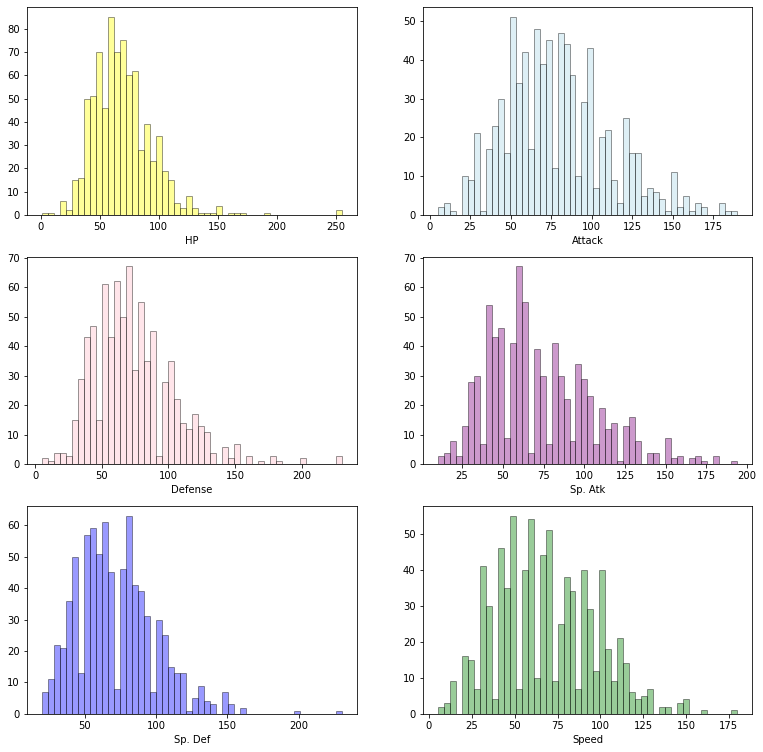

In [11]:
#HP, Attack, Defense, Special Attack, Special Defense, Speed, Total 통계의 분포

fig, axarr = plt.subplots(3, 2, figsize=(13, 13))

sns.distplot(pokemon['HP'], hist=True, kde=False, bins=50, color = 'yellow', 
             hist_kws={'edgecolor':'black'}, ax=axarr[0][0], axlabel='HP')


sns.distplot(pokemon['Attack'], hist=True, kde=False, bins=50, color = 'lightblue', 
             hist_kws={'edgecolor':'black'},ax=axarr[0][1], axlabel='Attack' )


sns.distplot(pokemon['Defense'], hist=True, kde=False, bins=50, color = 'pink', 
             hist_kws={'edgecolor':'black'}, ax=axarr[1][0], axlabel='Defense')


sns.distplot(pokemon['Sp. Atk'], hist=True, kde=False, bins=50, color = 'purple', 
             hist_kws={'edgecolor':'black'}, ax=axarr[1][1], axlabel='Sp. Atk')


sns.distplot(pokemon['Sp. Def'], hist=True, kde=False, bins=50, color = 'blue', 
             hist_kws={'edgecolor':'black'}, ax=axarr[2][0], axlabel='Sp. Def')


sns.distplot(pokemon['Speed'], hist=True, kde=False, bins=50, color = 'green', 
             hist_kws={'edgecolor':'black'}, ax=axarr[2][1], axlabel='Speed')

plt.show()

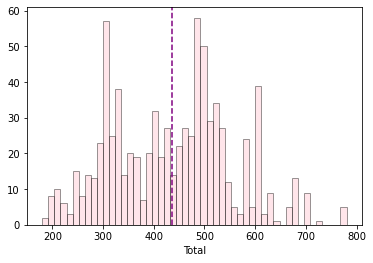

In [12]:
sns.distplot(pokemon['Total'], hist=True, kde=False, bins=50, color = 'pink', 
             hist_kws={'edgecolor':'black'}, axlabel='Total')
plt.axvline(pokemon['Total'].mean(),linestyle='dashed',color='purple')
figsize=(5, 5)

plt.show()

### Generation

In [13]:
pokemon.groupby(['Generation']).size().reset_index(name='counts')

,Generation,counts
0,1,166
1,2,106
2,3,160
3,4,121
4,5,165
5,6,82


In [14]:
pokemon['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

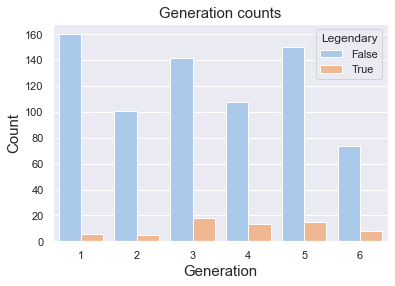

In [15]:
#generation 별 legendary
sns.set(style="darkgrid")
sns.set_context(font_scale =20)
sns.countplot(x='Generation',data=pokemon,saturation=0.75,palette="pastel", hue='Legendary')
plt.xlabel('Generation', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.title('Generation counts', fontsize=15)

plt.show()

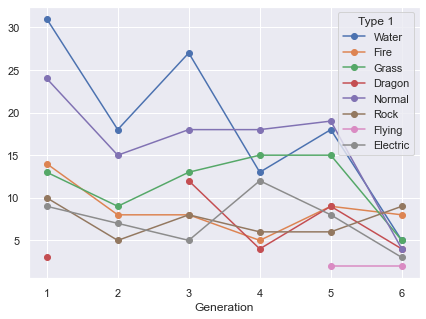

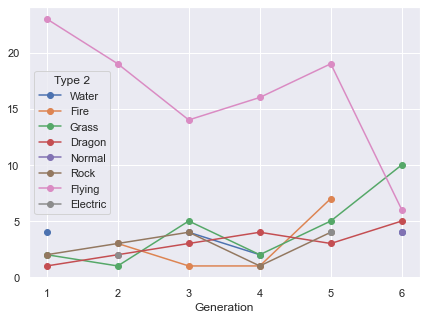

In [230]:
#generation 별 type
DType=pokemon.groupby(['Generation','Type 1']).count().reset_index()
DType=DType[['Generation','Type 1','Total']]
DType=DType.pivot('Generation','Type 1','Total')
DType[['Water','Fire','Grass','Dragon','Normal','Rock','Flying','Electric']].plot(marker='o')
fig=plt.gcf()
fig.set_size_inches(7,5)

DType=pokemon.groupby(['Generation','Type 2']).count().reset_index()
DType=DType[['Generation','Type 2','Total']]
DType=DType.pivot('Generation','Type 2','Total')
DType[['Water','Fire','Grass','Dragon','Normal','Rock','Flying','Electric']].plot(marker='o')
fig=plt.gcf()
fig.set_size_inches(7,5)

plt.show()

포켓몬은 1 세대에서 가장 많은 숫자를 기록했습니다. 그러나 2 세대에서는 그 수가 감소했습니다. 4 세대와 5 세대에서 다시 증가했습니다. 결국 6 세대에서 가장 낮은 숫자를가집니다.

물 포켓몬은 1 세대에서 가장 많은 숫자를 가지고 있습니다. 그러나 세대가지나면서 그 수가 감소했습니다. 마찬가지로 잔디 형 포켓몬은 5 세대까지 그 수가 증가했습니다. Type2 잔디 형 포켓몬의 수는 꾸준히 증가하고 있습니다. 드래곤 타입 포켓몬도 마찬가지입니다

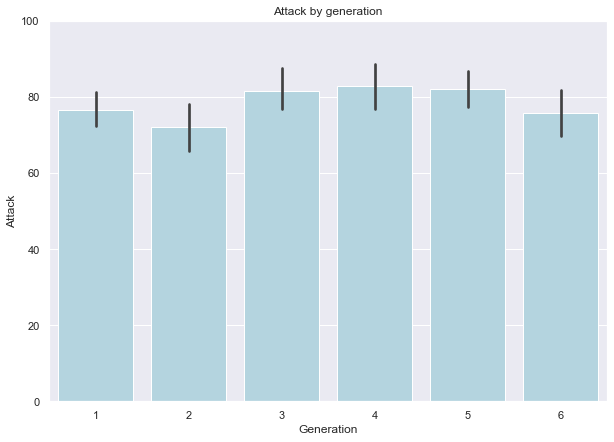

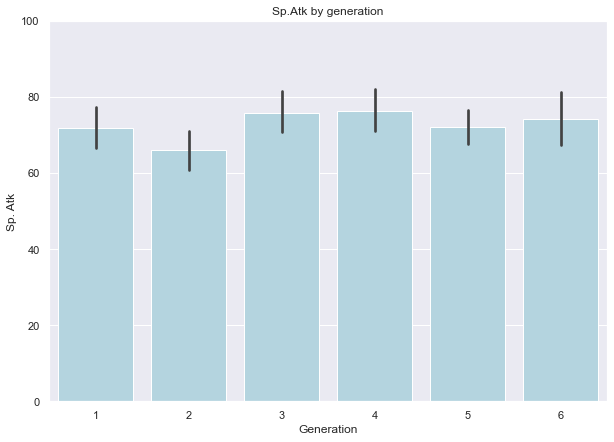

In [17]:
#attack별 generation
plt.subplots(figsize = (10,7))
plt.title('Attack by generation')
sns.barplot(x = "Generation", y = "Attack",data = pokemon,color="lightblue")
plt.ylim(0,100)
plt.show()


plt.subplots(figsize = (10,7))
plt.title('Sp.Atk by generation')
sns.barplot(x = "Generation", y = "Sp. Atk",data = pokemon,color="lightblue")
plt.ylim(0,100)
plt.show()

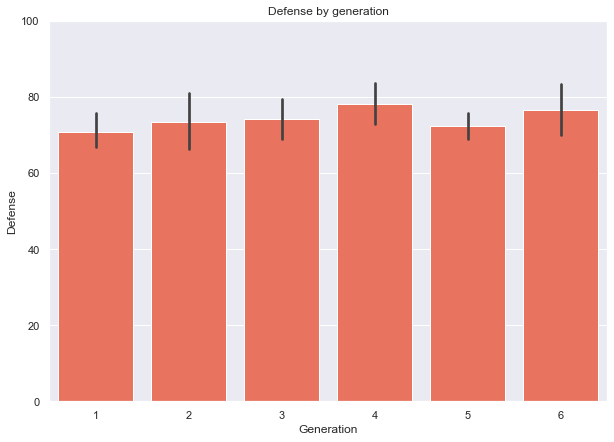

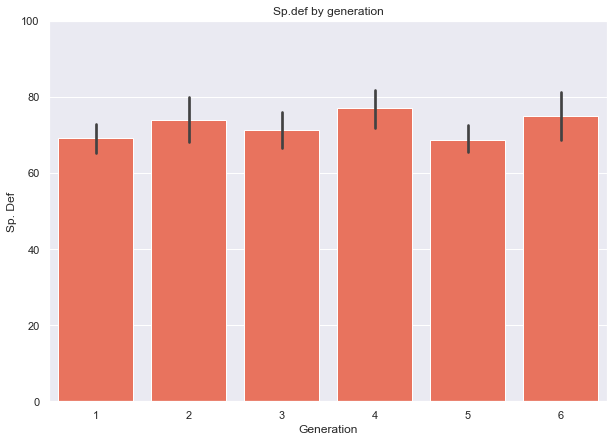

In [18]:
#defense별 generation
plt.subplots(figsize = (10,7))
plt.title('Defense by generation')
sns.barplot(x = "Generation", y = "Defense",data = pokemon,color="Tomato")
plt.ylim(0,100)
plt.show()


plt.subplots(figsize = (10,7))
plt.title('Sp.def by generation')
sns.barplot(x = "Generation", y = "Sp. Def",data = pokemon,color="Tomato")
plt.ylim(0,100)
plt.show()

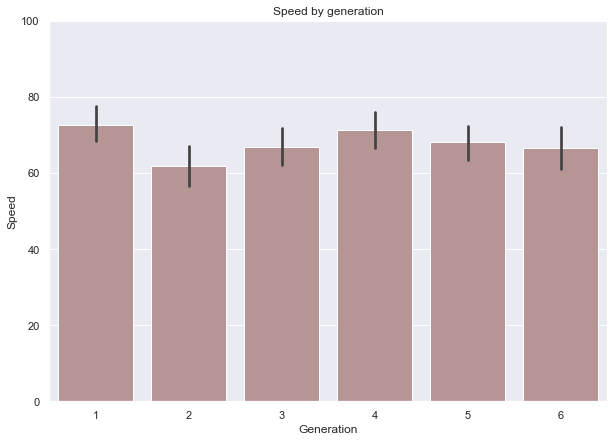

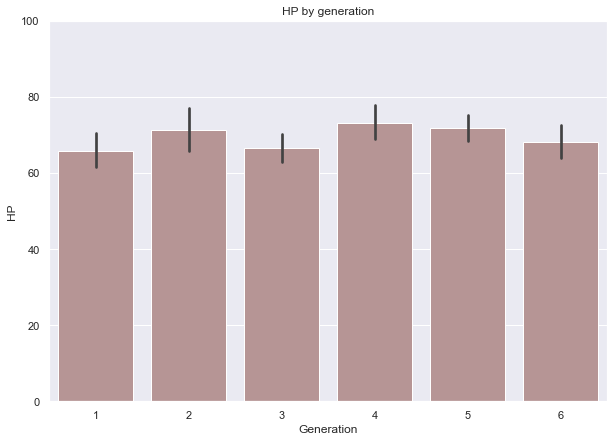

In [19]:
#speed 별 generation
plt.subplots(figsize = (10,7))
plt.title('Speed by generation')
sns.barplot(x = "Generation", y = "Speed",data = pokemon,color="rosybrown")
plt.ylim(0,100)
plt.show()

#Hp 별 generation
plt.subplots(figsize = (10,7))
plt.title('HP by generation')
sns.barplot(x = "Generation", y = "HP",data = pokemon,color="rosybrown")
plt.ylim(0,100)
plt.show()

In [ ]:
##4기 -> 최상위 애들 이름 뽑기

In [34]:
gen4=pokemon.loc[pokemon['Generation']==4]
gen4

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
432,387,Turtwig,Grass,NO,318,55,68,64,45,55,31,4,False
433,388,Grotle,Grass,NO,405,75,89,85,55,65,36,4,False
434,389,Torterra,Grass,Ground,525,95,109,105,75,85,56,4,False
435,390,Chimchar,Fire,NO,309,44,58,44,58,44,61,4,False
436,391,Monferno,Fire,Fighting,405,64,78,52,78,52,81,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,490,Manaphy,Water,NO,600,100,100,100,100,100,100,4,False
549,491,Darkrai,Dark,NO,600,70,90,90,135,90,125,4,True
550,492,ShayminLand Forme,Grass,NO,600,100,100,100,100,100,100,4,True
551,492,ShayminSky Forme,Grass,Flying,600,100,103,75,120,75,127,4,True


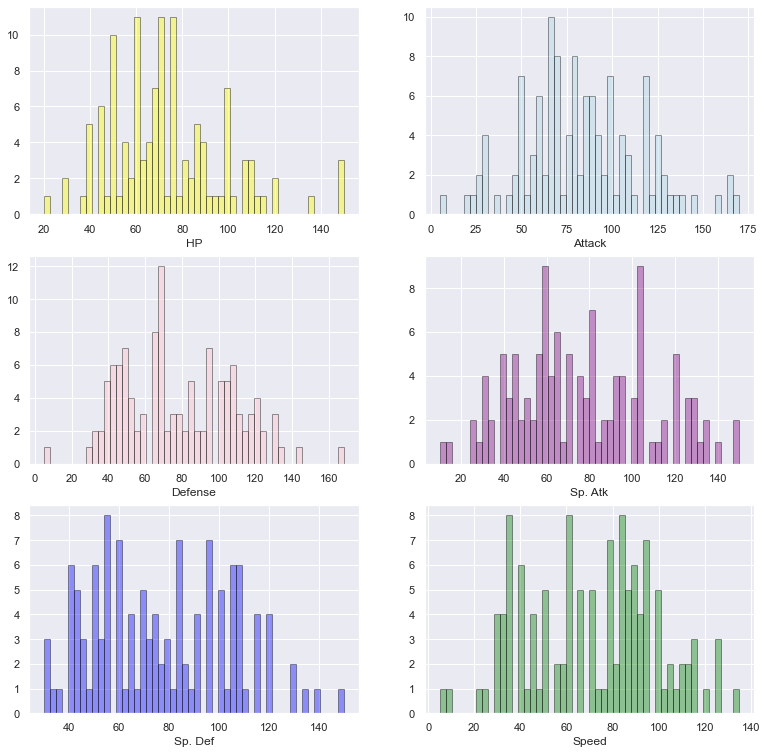

In [35]:
fig, axarr = plt.subplots(3, 2, figsize=(13, 13))


sns.distplot(gen4['HP'], hist=True, kde=False, bins=50, color = 'yellow', 
             hist_kws={'edgecolor':'black'}, ax=axarr[0][0], axlabel='HP')

sns.distplot(gen4['Attack'], hist=True, kde=False, bins=50, color = 'lightblue', 
             hist_kws={'edgecolor':'black'},ax=axarr[0][1], axlabel='Attack' )


sns.distplot(gen4['Defense'], hist=True, kde=False, bins=50, color = 'pink', 
             hist_kws={'edgecolor':'black'}, ax=axarr[1][0], axlabel='Defense')


sns.distplot(gen4['Sp. Atk'], hist=True, kde=False, bins=50, color = 'purple', 
             hist_kws={'edgecolor':'black'}, ax=axarr[1][1], axlabel='Sp. Atk')


sns.distplot(gen4['Sp. Def'], hist=True, kde=False, bins=50, color = 'blue', 
             hist_kws={'edgecolor':'black'}, ax=axarr[2][0], axlabel='Sp. Def')


sns.distplot(gen4['Speed'], hist=True, kde=False, bins=50, color = 'green', 
             hist_kws={'edgecolor':'black'}, ax=axarr[2][1], axlabel='Speed')

plt.show()

In [165]:
topHP=pd.DataFrame(gen4.iloc[:,[1,5,2]]).sort_values('HP').tail(5)
topHP

,Name,HP,Type 1
552,Arceus,120,Normal
495,Munchlax,135,Normal
544,GiratinaAltered Forme,150,Ghost
545,GiratinaOrigin Forme,150,Ghost
473,Drifblim,150,Ghost


In [166]:
topAttack=pd.DataFrame(gen4.iloc[:,[1,6,2]]).sort_values('Attack').tail(5)
topAttack

,Name,Attack,Type 1
498,LucarioMega Lucario,145,Fighting
543,Regigigas,160,Normal
454,Rampardos,165,Rock
527,GalladeMega Gallade,165,Psychic
494,GarchompMega Garchomp,170,Dragon


In [167]:
topDefense=pd.DataFrame(gen4.iloc[:,[1,7,2]]).sort_values('Defense').tail(5)
topDefense

,Name,Defense,Type 1
537,Uxie,130,Psychic
515,Rhyperior,130,Ground
529,Dusknoir,135,Ghost
528,Probopass,145,Rock
456,Bastiodon,168,Rock


In [168]:
topSpeed=pd.DataFrame(gen4.iloc[:,[1,10,2]]).sort_values('Speed').tail(5)
topSpeed

,Name,Speed,Type 1
552,Arceus,120,Normal
512,Weavile,125,Dark
549,Darkrai,125,Dark
551,ShayminSky Forme,127,Grass
476,LopunnyMega Lopunny,135,Normal


<AxesSubplot:title={'center':'topDefense Type'}, ylabel='Type 1'>

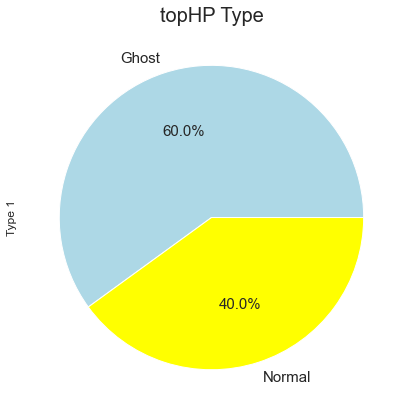

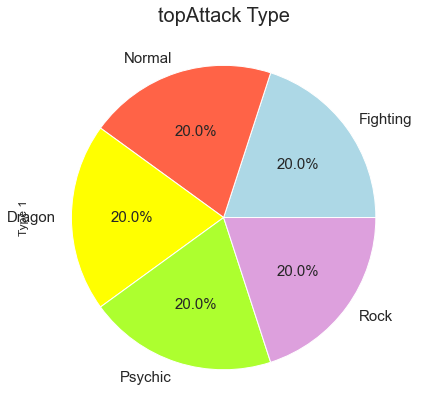

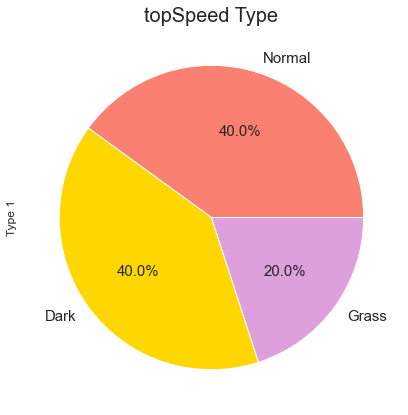

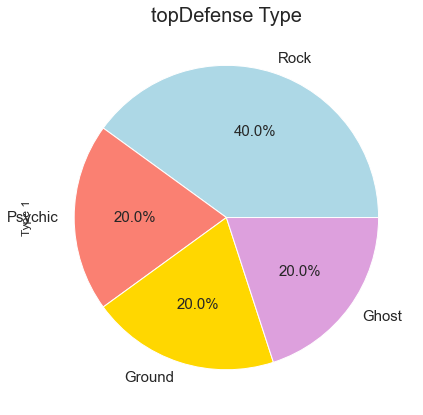

In [223]:
plt.figure(figsize=(7,7))
plt.title('topHP Type' , fontsize=20)
topHP['Type 1'].value_counts().plot.pie(autopct = '%1.1f%%' , 
                                         colors = ['lightblue','yellow'],fontsize=15)



plt.figure(figsize=(7,7))
plt.title('topAttack Type' , fontsize=20)
topAttack['Type 1'].value_counts().plot.pie(autopct = '%1.1f%%' , 
                                         colors = ['lightblue', 'tomato','yellow','greenyellow','plum'],fontsize=15)



plt.figure(figsize=(7,7))
plt.title('topSpeed Type' , fontsize=20)
topSpeed['Type 1'].value_counts().plot.pie(autopct = '%1.1f%%' , 
                                         colors = ['salmon', 'gold','plum'],fontsize=15)


plt.figure(figsize=(7,7))
plt.title('topDefense Type' , fontsize=20)
topDefense['Type 1'].value_counts().plot.pie(autopct = '%1.1f%%' , 
                                         colors = ['lightblue', 'salmon','gold','plum'] , fontsize=15)

### type

In [21]:
pokemon.groupby(['Type 1']).size().reset_index(name='counts')

,Type 1,counts
0,Bug,69
1,Dark,31
2,Dragon,32
3,Electric,44
4,Fairy,17
5,Fighting,27
6,Fire,52
7,Flying,4
8,Ghost,32
9,Grass,70


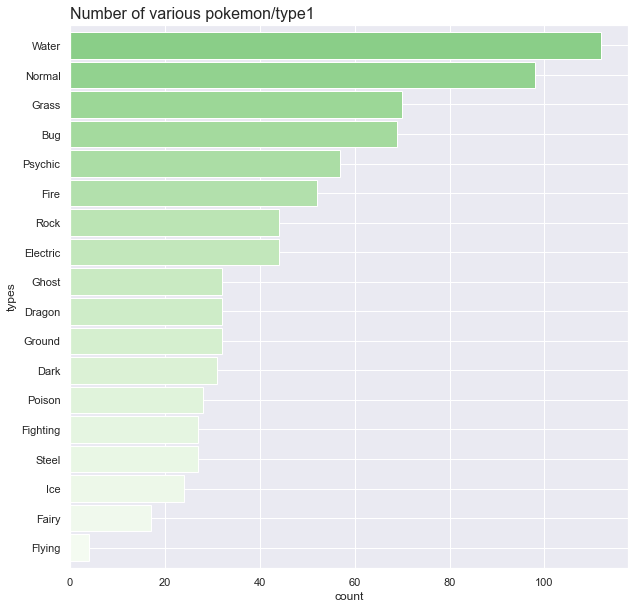

In [224]:
plt.subplots(figsize=(10,10))
ax = pokemon['Type 1'].value_counts().sort_values(ascending=True).plot.barh(width=.9,
                                                    color=sns.color_palette('Greens',40))
ax.set_xlabel('count')
ax.set_ylabel('types')
plt.title("Number of various pokemon/type1",loc='left', fontsize=16)

plt.show()

In [225]:
pokemon.groupby(['Type 2']).size().reset_index(name='counts')

,Type 2,counts
0,Bug,3
1,Dark,20
2,Dragon,18
3,Electric,6
4,Fairy,23
5,Fighting,26
6,Fire,12
7,Flying,97
8,Ghost,14
9,Grass,25


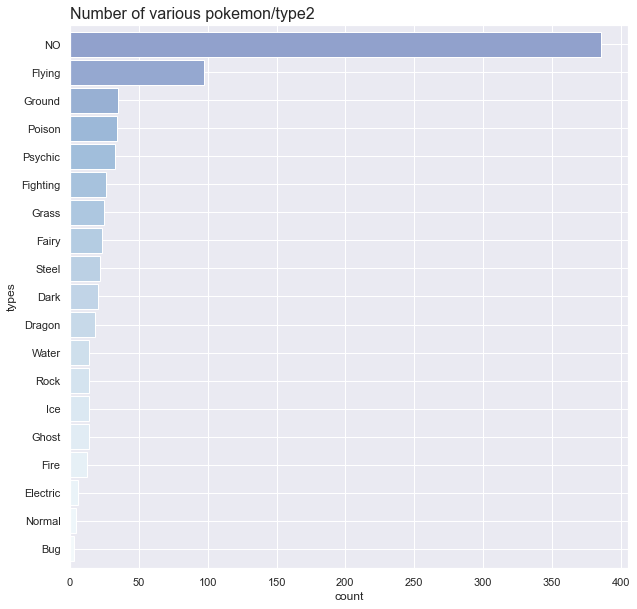

In [226]:
plt.subplots(figsize=(10,10))
ax = pokemon['Type 2'].value_counts().sort_values(ascending=True).plot.barh(width=.9,
                                                    color=sns.color_palette('BuPu',40))
ax.set_xlabel('count')
ax.set_ylabel('types')
plt.title("Number of various pokemon/type2",loc='left', fontsize=16)

plt.show()

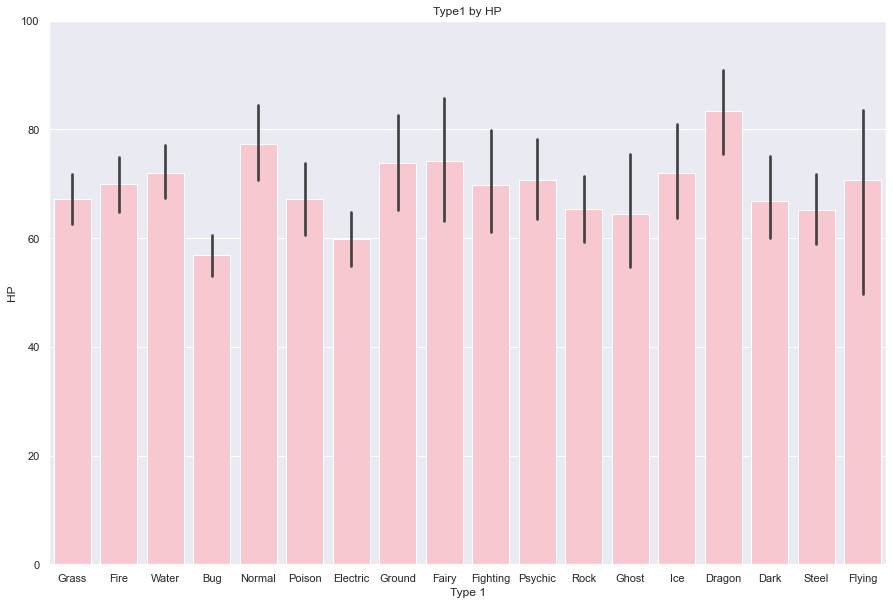

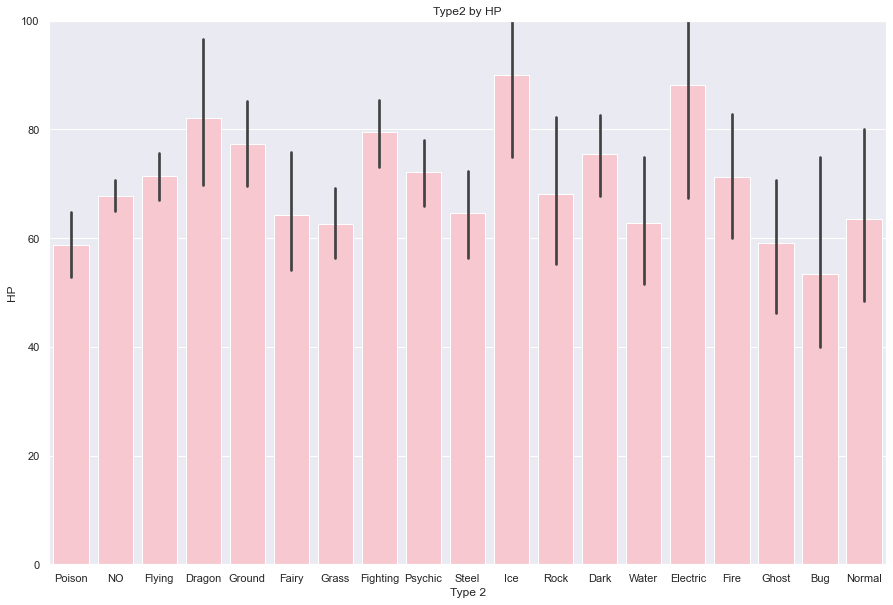

In [227]:
#type 1별 HP
plt.subplots(figsize = (15,10))
plt.title('Type1 by HP')
sns.barplot(x = "Type 1", y = "HP",data = pokemon,color="pink")
plt.ylim(0,100)
plt.show()

#type 2별 HP
plt.subplots(figsize = (15,10))
plt.title('Type2 by HP')
sns.barplot(x = "Type 2", y = "HP",data = pokemon,color="pink")
plt.ylim(0,100)
plt.show()

### attack

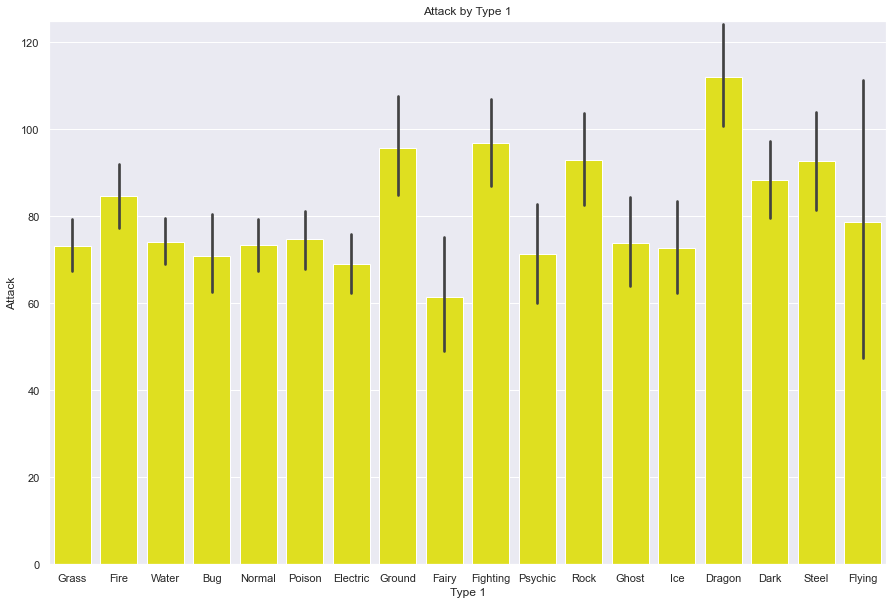

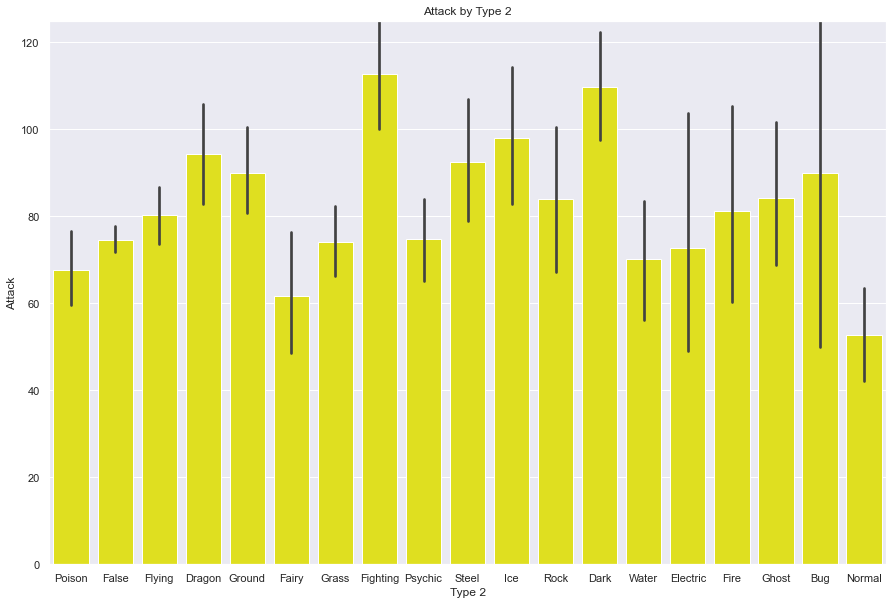

In [40]:
#attack별 type1
plt.subplots(figsize = (15,10))
plt.title('Attack by Type 1')
sns.barplot(x = "Type 1", y = "Attack",data = pokemon,color='yellow')
plt.ylim(0,125)
plt.show()

#attack별 type2
plt.subplots(figsize = (15,10))
plt.title('Attack by Type 2')
sns.barplot(x = "Type 2", y = "Attack",data = pokemon,color="yellow")
plt.ylim(0,125)
plt.show()

In [ ]:
#타입별 hp, attack, defense,spatk,spdef,speed 비교
# generation 별 비교




# attack, HP, Sp.Atk, Sp. Def, Defense, Speed -> top5


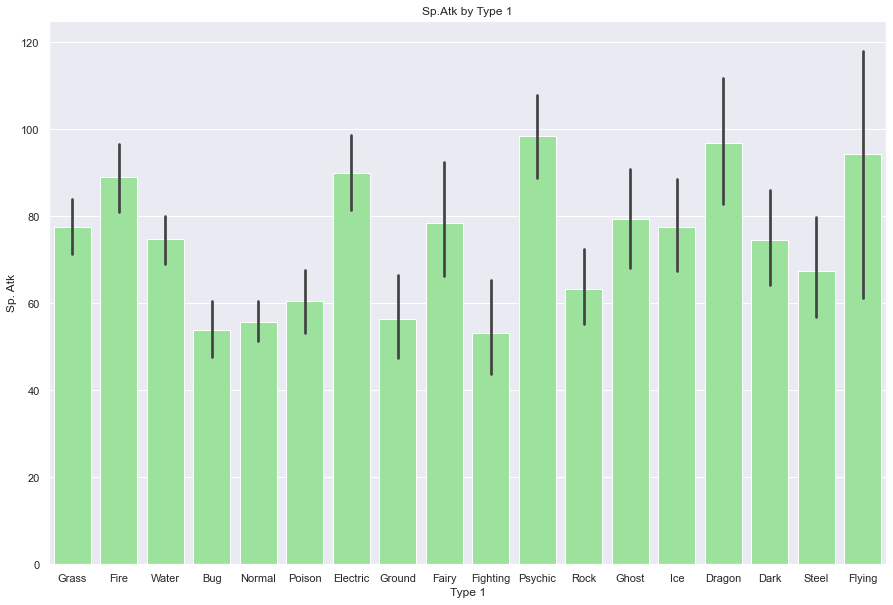

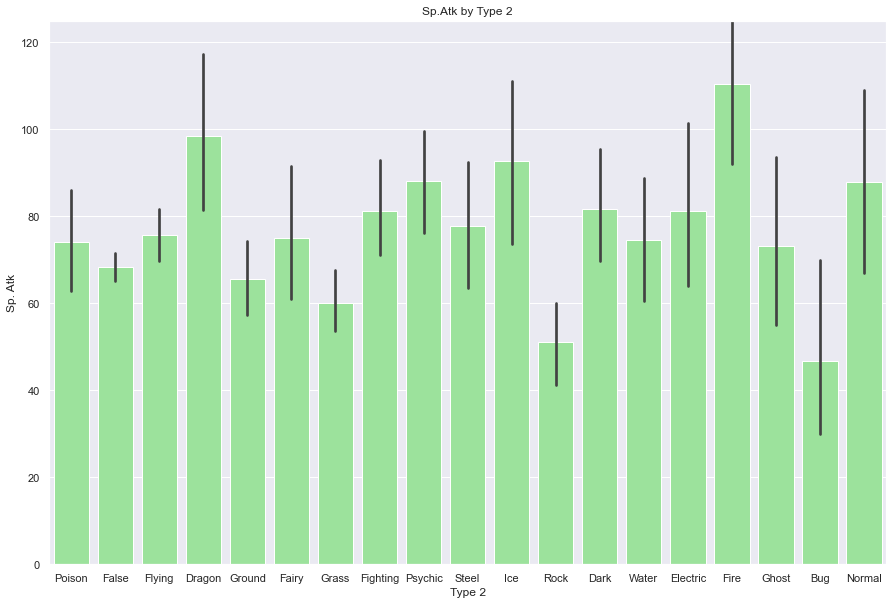

In [41]:
plt.subplots(figsize = (15,10))
plt.title('Sp.Atk by Type 1')
sns.barplot(x = "Type 1", y = "Sp. Atk",data = pokemon,color="lightgreen")
plt.ylim(0,125)
plt.show()

plt.subplots(figsize = (15,10))
plt.title('Sp.Atk by Type 2')
sns.barplot(x = "Type 2", y = "Sp. Atk",data = pokemon,color="lightgreen")
plt.ylim(0,125)
plt.show()

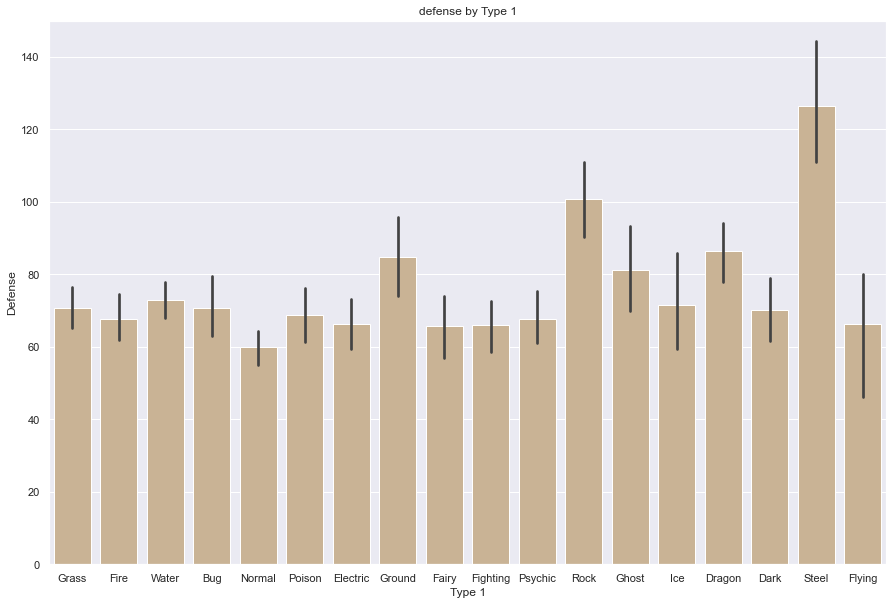

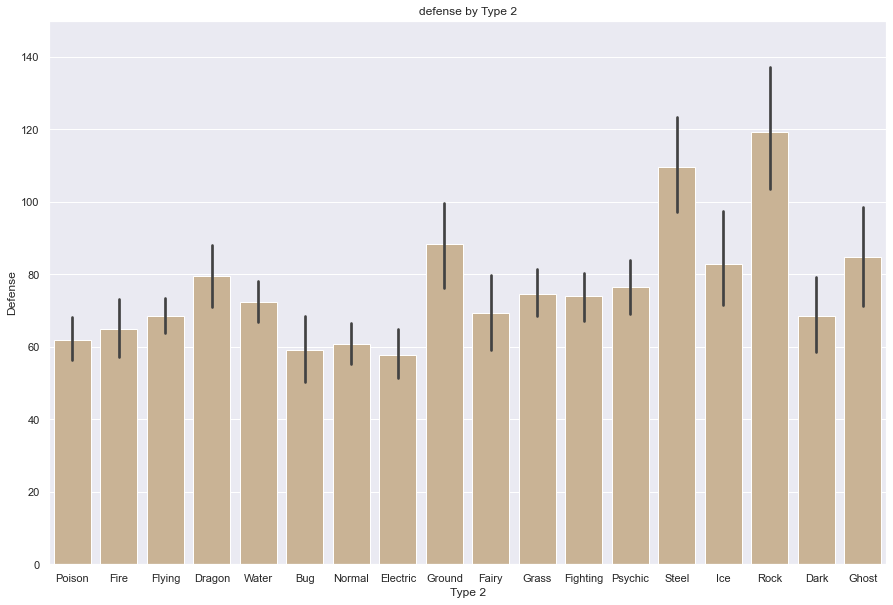

In [140]:
plt.subplots(figsize = (15,10))
plt.title('defense by Type 1')
sns.barplot(x = "Type 1", y = "Defense",data = pokemon,color="tan")
plt.ylim(0,150)
plt.show()

plt.subplots(figsize = (15,10))
plt.title('defense by Type 2')
sns.barplot(x = "Type 2", y = "Defense",data = pokemon,color="tan")
plt.ylim(0,150)
plt.show()


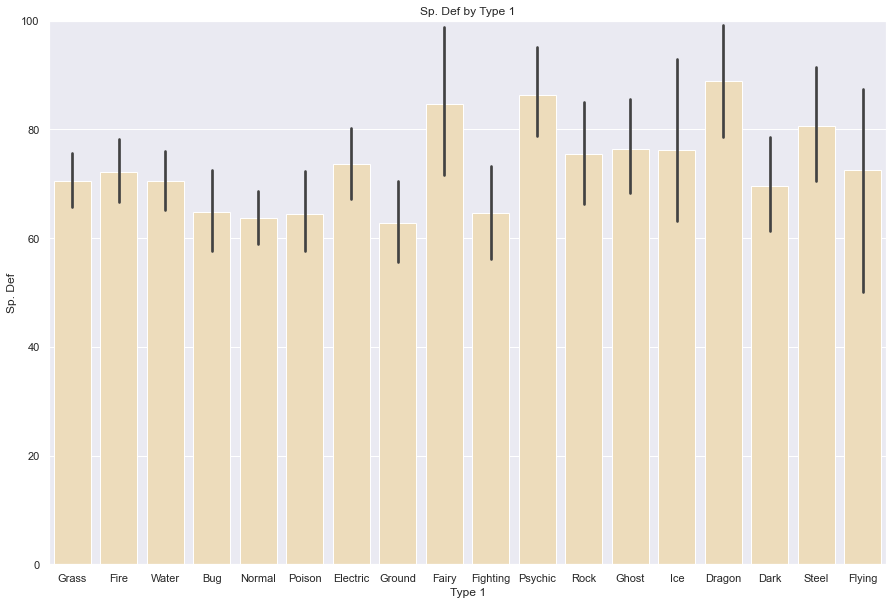

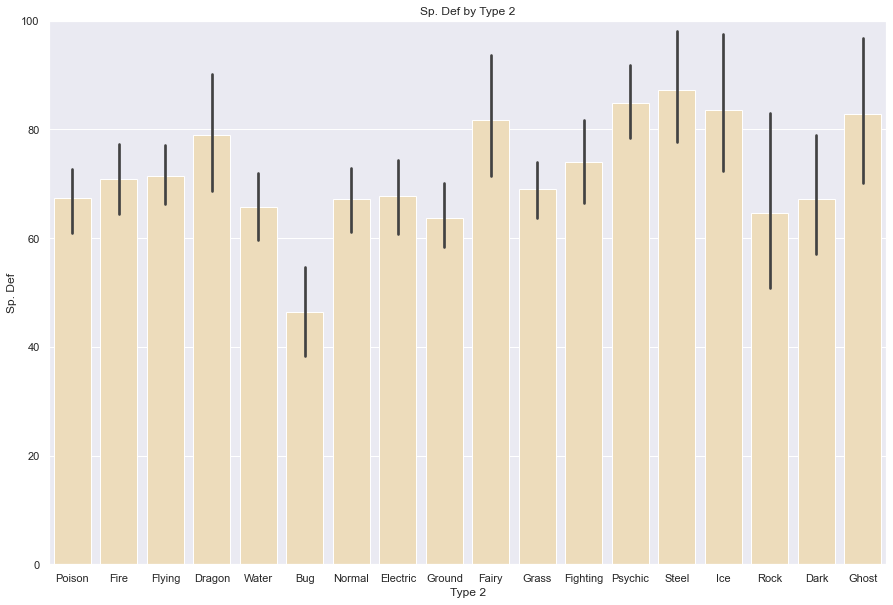

In [142]:
plt.subplots(figsize = (15,10))
plt.title('Sp. Def by Type 1')
sns.barplot(x = "Type 1", y = "Sp. Def",data = pokemon,color="wheat")
plt.ylim(0,100)
plt.show()

plt.subplots(figsize = (15,10))
plt.title('Sp. Def by Type 2')
sns.barplot(x = "Type 2", y = "Sp. Def",data = pokemon,color="wheat")
plt.ylim(0,100)
plt.show()


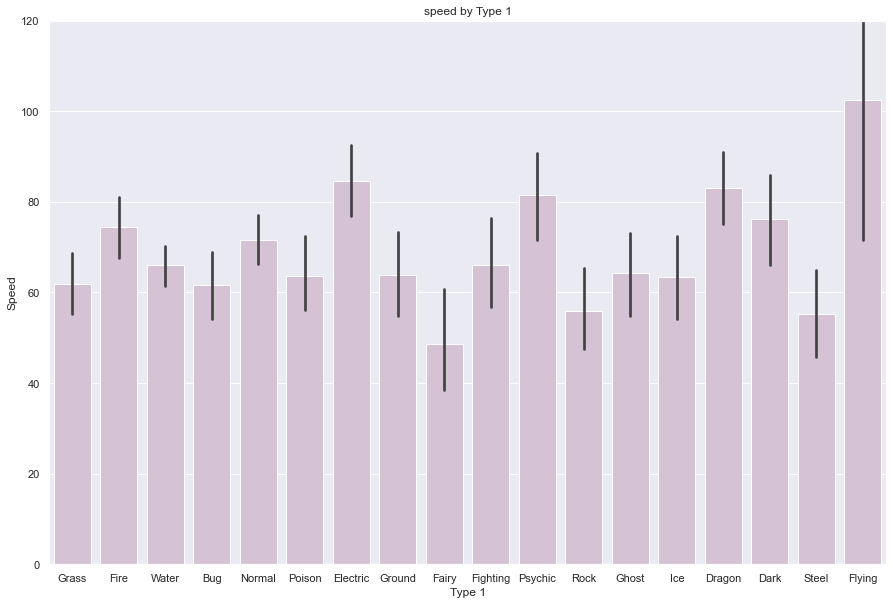

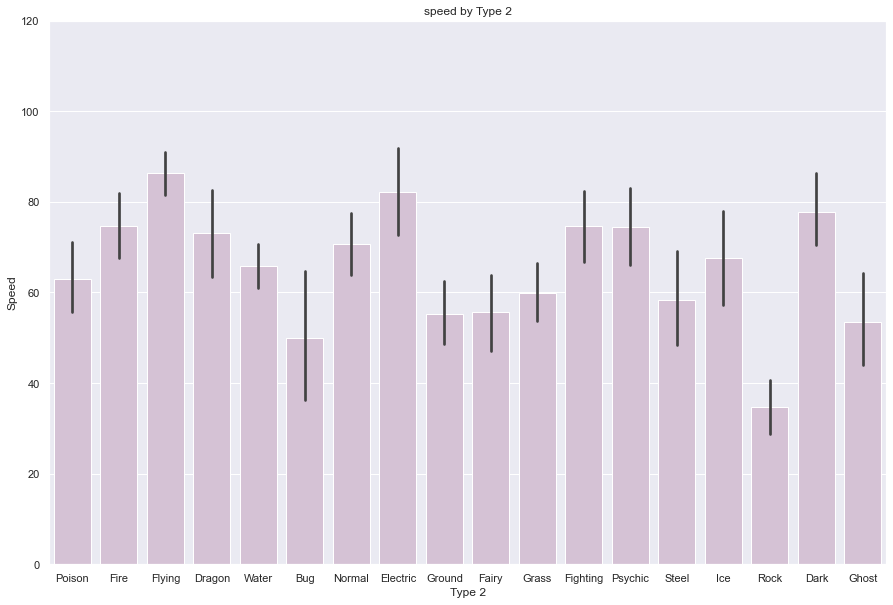

In [143]:
plt.subplots(figsize = (15,10))
plt.title('speed by Type 1')
sns.barplot(x = "Type 1", y = "Speed",data = pokemon,color="thistle")
plt.ylim(0,120)
plt.show()

plt.subplots(figsize = (15,10))
plt.title('speed by Type 2')
sns.barplot(x = "Type 2", y = "Speed",data = pokemon,color="thistle")
plt.ylim(0,120)
plt.show()


## 이미지 데이터 

In [163]:
pokemon_list

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN
...,...,...,...
804,stakataka,Rock,Steel
805,blacephalon,Fire,Ghost
806,zeraora,Electric,NaN
807,meltan,Steel,NaN


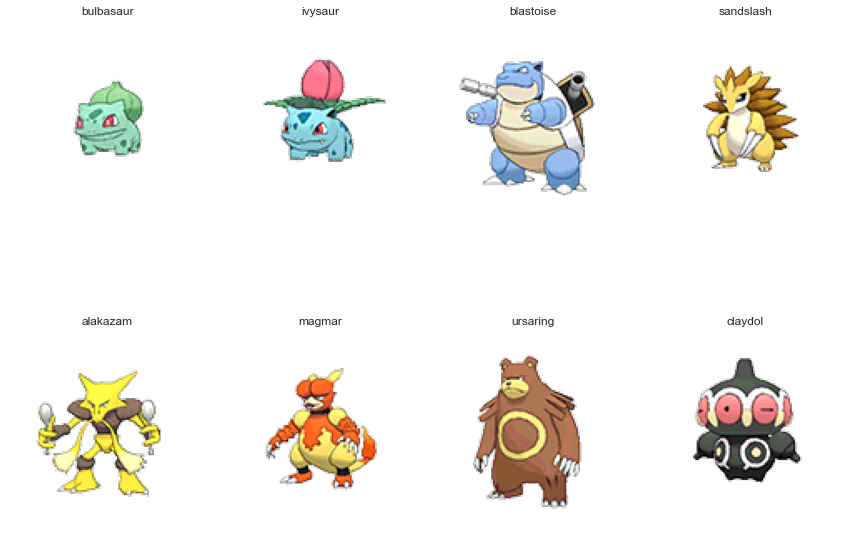

In [194]:
import matplotlib.image as mpimg
path = 'C:/Users/janyq/OneDrive/바탕 화면/포켓몬/images/images/'
fig,((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(12, 10))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
for i in range(8):
    img = mpimg.imread(path+pokemon_list['Name'][i**3]+'.png')
    ax[i].imshow(img)
    ax[i].set_title(pokemon_list['Name'][i**3])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [251]:
pokemon_list

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN
...,...,...,...
804,stakataka,Rock,Steel
805,blacephalon,Fire,Ghost
806,zeraora,Electric,NaN
807,meltan,Steel,NaN


In [253]:
pokemon_list.info

<bound method DataFrame.info of             Name     Type1   Type2
0      bulbasaur     Grass  Poison
1        ivysaur     Grass  Poison
2       venusaur     Grass  Poison
3     charmander      Fire     NaN
4     charmeleon      Fire     NaN
..           ...       ...     ...
804    stakataka      Rock   Steel
805  blacephalon      Fire   Ghost
806      zeraora  Electric     NaN
807       meltan     Steel     NaN
808     melmetal     Steel     NaN

[809 rows x 3 columns]>

In [252]:
images_dir = "C:/Users/janyq/OneDrive/바탕 화면/포켓몬/images/images/"

In [254]:
types = pokemon_list.Type1.unique()
types

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [255]:
os.mkdir("Typepk")

for t in types:
    os.mkdir("Typepk/{}".format(t))

In [256]:
for t in types:
    aux_type = pokemon_list[pokemon_list.Type1.eq(t)]
    for pokemon in aux_type.Name:
        for filename in os.listdir(images_dir):
            original_path = "{}{}".format(images_dir, filename)
            
            extension = os.path.basename(original_path)
            
            poke_dir = os.path.splitext(original_path)[0]
           
            poke_name = os.path.basename(poke_dir)
            if(pokemon == poke_name):
                target_path = "Typepk/{}/{}".format(t, extension)
                shutil.copyfile(original_path, target_path)

In [257]:
fill_color = (255, 255, 255)
new_images_dir = "Typepk/"

for t in types:
    for filename in os.listdir(new_images_dir):
        type_dir = "{}{}/".format(new_images_dir, filename)
        for pokemon in os.listdir(type_dir):
            full_path = "{}/{}".format(type_dir, pokemon)
            file_dir, file_extension = os.path.splitext(full_path)
            if file_extension == ".png":
                im = Image.open(full_path)
                im = im.convert("RGBA")
                if im.mode in ('RGBA', 'LA'):
                    bg = Image.new(im.mode[:-1], im.size, fill_color)
                    bg.paste(im, im.split()[-1])  
                    bg.save("{}.jpg".format(file_dir))
                    os.remove(full_path)

In [258]:
batch_size = 16
img_height = 120
img_width = 120

In [259]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  new_images_dir,
  validation_split=0.2,
  subset="training",
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 809 files belonging to 18 classes.
Using 648 files for training.


In [260]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  new_images_dir,
  validation_split=0.2,
  subset="validation",
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 809 files belonging to 18 classes.
Using 161 files for validation.


In [261]:
class_names = train_ds.class_names
print(class_names)

['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water']


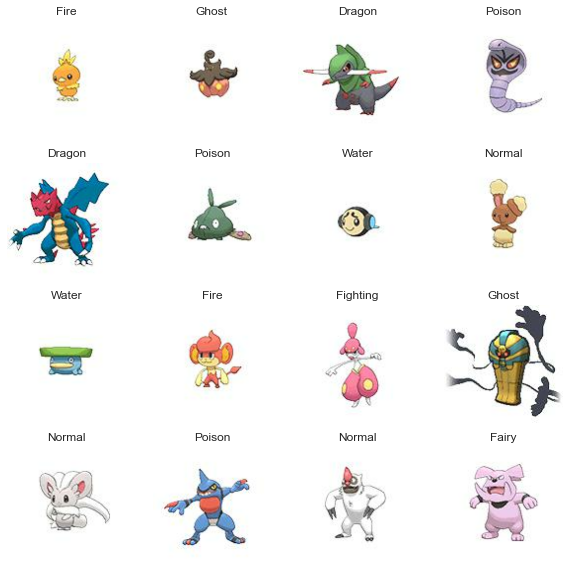

In [262]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")